In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%pip install pandas
import pandas as pd

class Rect:
    def __init__(self, bottom_left, top_right):
        assert bottom_left[0] < top_right[0]
        assert bottom_left[1] < top_right[1]
        self._bl = bottom_left
        self._tr = top_right

    @property
    def bottom_left(self):
        return self._bl

    @property
    def top_right(self):
        return self._tr
    
    @property
    def bottom_right(self):
        return np.array([self._tr[0], self._bl[1]])
    
    @property
    def top_left(self):
        return np.array([self._bl[0], self._tr[1]])

    @property
    def center(self):
        return (self._bl + self._tr) / 2

    @property
    def w(self):
        return (self._tr - self._bl)[0]

    @property
    def h(self):
        return (self._tr - self._bl)[1]
    
    @property
    def xy(self):
        return (self._bl[0], self._bl[1])

    @property
    def area(self):
        return self.w * self.h

    def draw(self, ax, edgecolor='black', color=None, alpha=1.0):
        rect = patches.Rectangle(self.xy, self.w, self.h, linewidth=1, edgecolor=edgecolor, facecolor=color, alpha=alpha)
        ax.add_patch(rect)
    
    @staticmethod
    def make(x=None, y=None, w=None, h=None, bottom_left=None, top_right=None, top_left=None, bottom_right=None):
        if x and y and w and h:
            return Rect(np.array([x, y]), np.array([x + w, y + h]))
        elif bottom_left is not None and top_right is not None:
            return Rect(bottom_left, top_right)
        elif top_left is not None and bottom_right is not None:
            bl = np.array([top_left[0],bottom_right[1]])
            tr = np.array([bottom_right[0],top_left[1]])
            return Rect(bl, tr)

def pt(x, y):
    return np.array([x, y])


Note: you may need to restart the kernel to use updated packages.


East
Panels: 9
area(m^2): 15.076189202400004
nominal power(watts): 3285
West
Panels: 12
area(m^2): 20.101585603200004
nominal power(watts): 4380


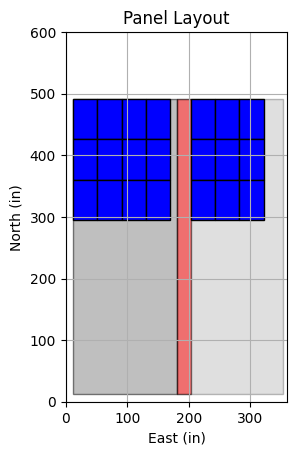

In [44]:
ft=12

def layout_panels(bbox, panel_w, panel_h):
    panels = []
    panel_dims = pt(panel_w, panel_h)
    for c in range(int(bbox.w / panel_w)):
        for r in range(int(bbox.h / panel_h)):
            panels.append(Rect.make(
                top_left=bbox.top_left + panel_dims * pt(c, -r), 
                bottom_right=bbox.top_left + panel_dims * pt(c+1, -(r+1))
            ))
    return panels

west_roof_dims = pt(14*ft + 5, 40 * ft)
east_roof_dims = pt(14*ft + 5, 40 * ft)

# panel_w, panel_h = 77, 39
panel_w, panel_h = 66, 39
panel_w, panel_h = 65.9, 39.4
panel_watts = 365
# panel_w, panel_h = 39, 77
panel_dims = pt(panel_w, panel_h)

# Compute roof zone bounds 
west_roof = Rect.make(x=1 * ft, y=1 * ft, w=14 * ft, h=40 * ft)
east_roof = Rect.make(top_left=west_roof.top_right, bottom_right=west_roof.top_right+east_roof_dims * pt(1, -1))
east_vents = Rect.make(x=east_roof.bottom_left[0], y=east_roof.bottom_left[1], w=east_roof.w-(12*ft + 6), h=40*ft)

# compute areas where panels can be placed
west_panel_footprint = Rect.make(top_left=west_roof.top_left, bottom_right=west_roof.bottom_right + pt(0, 20 * ft))
east_panel_footprint = Rect.make(top_left=east_vents.top_right, bottom_right=east_roof.bottom_right + pt(0, 20 * ft))

# layout panels
west_panels = layout_panels(west_panel_footprint, panel_h, panel_w)
east_panels = layout_panels(east_panel_footprint, panel_h, panel_w)

# Example usage:
fig, ax = plt.subplots()

## Draw the roof and layout
west_roof.draw(ax, color='grey', alpha=0.5)
east_roof.draw(ax, color='grey', alpha=0.25)
east_vents.draw(ax, color='red', alpha=0.5)

for panel in west_panels + east_panels:
    panel.draw(ax, color='blue')

def stats(region, panels):
    area_sq_in = 0
    for p in panels:
        area_sq_in += p.area
    print(region)
    print(f'Panels: {len(panels)}')
    print(f'area(m^2): {area_sq_in * 0.00064516}')
    print(f'nominal power(watts): {len(panels) * panel_watts}')

stats('East', east_panels)
stats('West', west_panels)

plt.xlabel('East (in)')
plt.ylabel('North (in)')
ax.set_xlim(0, 30 * 12)  # Setting x-axis bounds
ax.set_ylim(0, 50 * 12)  # Setting y-axis bounds

plt.title('Panel Layout')
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')  # Set aspect ratio to be equal
plt.show()

In [17]:
east_estimates = pd.read_csv("monthly-east.csv")
west_estimates = pd.read_csv("monthly-west.csv")
usage = pd.read_csv("usage.csv")

In [18]:
usage

,Energy consumption time period,Usage(Real energy in kilowatt-hours),Cost(US Dollar),Events occurred
0,2022-12-26 00:00 to 2023-01-23 00:00,2848.0,239.11,0
1,2023-01-23 00:00 to 2023-02-20 00:00,3264.0,270.60,0
2,2023-02-20 00:00 to 2023-03-25 01:00,3237.0,263.42,0
3,2023-03-25 00:00 to 2023-04-24 00:00,1900.0,156.41,0
4,2023-04-24 00:00 to 2023-05-22 00:00,1120.0,100.48,0
5,2023-05-22 00:00 to 2023-06-23 00:00,1149.0,100.39,0
6,2023-06-23 00:00 to 2023-07-24 00:00,1193.0,102.92,0
7,2023-07-24 00:00 to 2023-08-25 00:00,1040.0,94.95,0
8,2023-08-25 00:00 to 2023-09-25 00:00,963.0,85.42,0
9,2023-09-25 00:00 to 2023-10-23 00:00,880.0,80.68,0


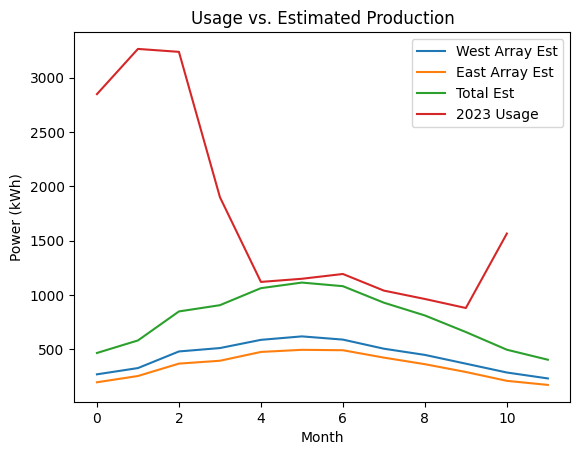

Total consumption in 2023: 19159.0 kWh


In [21]:
# Example usage:
fig, ax = plt.subplots()
plt.xlabel('Month')
plt.ylabel('Power (kWh)')
plt.title('Usage vs. Estimated Production')
ax.plot(west_estimates["AC System Output (kWh)"], label="West Array Est")
ax.plot(east_estimates["AC System Output (kWh)"], label="East Array Est")
ax.plot(east_estimates["AC System Output (kWh)"] + west_estimates["AC System Output (kWh)"], label="Total Est")
ax.plot(usage["Usage(Real energy in kilowatt-hours)"], label="2023 Usage")
plt.legend()
plt.show()
print(f'Total consumption in 2023: {sum(usage["Usage(Real energy in kilowatt-hours)"])} kWh')